- Nama : Shafira Faira Huwaida
- Email : shafirafairahuwaida@gmail.com

## Background

Analisis churn data bank adalah proses menganalisis perilaku pelanggan yang meninggalkan layanan atau produk perbankan. Tujuan dari analisis ini adalah untuk memahami faktor-faktor yang mempengaruhi churn, mengidentifikasi pola churn, dan merancang strategi untuk mengurangi churn rate.

# Problem Statement

Bagaimana mengembangkan pendekatan analisis data yang efektif untuk mengidentifikasi pola churn dan meramalkan nasabah yang berpotensi churn dengan akurat, sehingga Bank dapat mengambil langkah-langkah pro-aktif untuk mempertahankan pelanggan dan mengurangi churn rate mereka?

# Objective

- **Mengidentifikasi Pola Churn**: Mengembangkan pendekatan analisis data yang efektif untuk mengidentifikasi pola churn dari data pelanggan yang tersedia.
- **Prediksi Churn**: Membangun model ramalan yang akurat untuk mengidentifikasi pelanggan yang berpotensi churn dengan tepat waktu, sehingga langkah-langkah pencegahan dapat diambil dengan cepat.
- **Analisis Faktor-Faktor Pengaruh**: Menganalisis faktor-faktor yang mempengaruhi keputusan pelanggan untuk berhenti berlangganan, termasuk kualitas layanan, harga, persaingan, dan layanan pelanggan.
- **Pengembangan Strategi**: Menggunakan hasil analisis untuk mengembangkan strategi yang efektif dalam mempertahankan pelanggan, seperti peningkatan layanan, penawaran harga yang kompetitif, dan promosi yang menarik.


## Data Understanding

Pada project ini data yang digunakan bersumber dari kaggle: [Bank Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data)

Berikut adalah atribut yang ada pada dataset:


| Nama Atribut        | Deskripsi                                                                                          |
|---------------------|----------------------------------------------------------------------------------------------------|
|RowNumber |sesuai dengan nomor record (baris) dan tidak berpengaruh pada output.|
|CustomerId | berisi nilai acak dan tidak berpengaruh pada pelanggan yang keluar dari bank.|
|Surname | nama keluarga nasabah tidak berdampak pada keputusan mereka untuk keluar dari bank.|
| CreditScore | dapat berdampak pada churn nasabah, karena nasabah dengan skor kredit yang lebih tinggi cenderung tidak meninggalkan bank.|
| Geography | lokasi nasabah dapat mempengaruhi keputusan mereka untuk meninggalkan bank.|
| Gender | menarik untuk mengeksplorasi apakah gender berperan dalam keputusan nasabah meninggalkan bank.|
|Age | hal ini tentunya relevan, karena nasabah yang lebih tua cenderung meninggalkan bank mereka dibandingkan nasabah yang lebih muda.|
| Tenure | mengacu pada jumlah tahun nasabah telah menjadi nasabah bank. Biasanya, nasabah yang lebih tua lebih setia dan kecil kemungkinannya untuk meninggalkan bank.|
|Balance | juga merupakan indikator churn nasabah yang sangat baik, karena orang-orang dengan saldo rekening yang lebih tinggi cenderung tidak meninggalkan bank dibandingkan dengan mereka yang memiliki saldo lebih rendah.|
| NumOfProducts | mengacu pada jumlah produk yang dibeli pelanggan melalui bank. |
| HasCrCard | menunjukkan apakah pelanggan memiliki kartu kredit atau tidak. Kolom ini juga relevan, karena orang yang memiliki kartu kredit cenderung tidak meninggalkan bank. |
| IsActiveMember | pelanggan aktif cenderung tidak meninggalkan bank.
| EstimatedSalary| seperti halnya saldo, orang-orang dengan gaji lebih rendah lebih cenderung meninggalkan bank dibandingkan dengan mereka yang gajinya lebih tinggi.|
| Exited | baik nasabah meninggalkan bank atau tidak. (0) tidak churn (1) churn|
|Complain | pelanggan mempunyai keluhan atau tidak. |
| Satisfaction Score | Skor yang diberikan oleh pelanggan untuk penyelesaian keluhan mereka. |
| Card Type | jenis kartu yang dipegang oleh pelanggan. |
| Points Earned | poin yang diperoleh pelanggan karena menggunakan kartu kredit.


# Key Questions

Berdasarkan dataset yang digunakan,fokus analisis dilakukan untuk menjawab pertanyaan berikut:

- Bagaimana distribusi nasabah yang telah menggunakan layanan perusahaan menurut jumlah tahun (Tenure)?
- Bagaimana frekuensi perbandingan nasabah churn dan tidak?
- Apakah jenis kelamin (perempuan atau laki-laki) mempengaruhi churn rate?
- Apakah kepemilikan kartu kredit berpengaruh pada churn rate nasabah?
- Apakah active atau tidaknya member memengaruhi kecenderungan churn rate nasabah?
- Apakah ada pengaruh usia dan churn rate nasabah?

Dengan analisis ini, dapatdiketahui faktor-faktor apa yang mempengaruhi churn rate nasabah Bank dan mengembangkan strategi untuk meminimalkan churn rate tersebut.

## Import Libraries

In [ ]:
# data processing, CSV file I/O
import pandas as pd
import numpy as np

#library untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler,StandardScaler,\
                                    OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#oversampling techinque for imbalance
from imblearn.over_sampling import SMOTE

#modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model improvement
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,GridSearchCV,RandomizedSearchCV
from sklearn.inspection import permutation_importance

#evaluation
from sklearn.metrics import classification_report,\
confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

#evaluation plots
from yellowbrick.classifier import (
    DiscriminationThreshold,
    PrecisionRecallCurve
)
# #storing and loading
# import pickle
# import json

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/My Drive/AI_NOID/Customer-Churn-Records.csv')
df = df.drop('Complain',axis=1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [ ]:
display(df.describe())
display(df.describe(include='object'))

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000


,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

In [ ]:
df.isnull().sum() #cek data yang hilang

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Memastikan bahwa setiap id pelanggan hanya muncul sekali

In [ ]:
df['CustomerId'].value_counts(ascending=False)

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

In [ ]:
#cek duplikasi data
print('Total customerID yang terduplikasi:',
      df.duplicated(subset='CustomerId').sum())

Total customerID yang terduplikasi: 0


### Menghapus kolom row number karena tidak digunakan

In [ ]:
df.drop(columns=['RowNumber'], inplace=True)

## Exploratory Data Analysis (EDA)

In [ ]:
categorical_cols= list(df.select_dtypes(include='object'))
print('List of categorical columns:',categorical_cols)

numerical_cols= list(df.select_dtypes(include='number'))
print('list of numerical columns: ',numerical_cols)

List of categorical columns: ['Surname', 'Geography', 'Gender', 'Card Type']
list of numerical columns:  ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score', 'Point Earned']


In [ ]:
df['HasCrCard'].unique()

array([1, 0])

In [ ]:
df['IsActiveMember'].unique()

array([1, 0])

In [ ]:
df['Exited'].unique()

array([1, 0])

In [ ]:
#df['Complain'].unique()

### EDA variabel numeric

List of numerical columns: ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score', 'Point Earned']


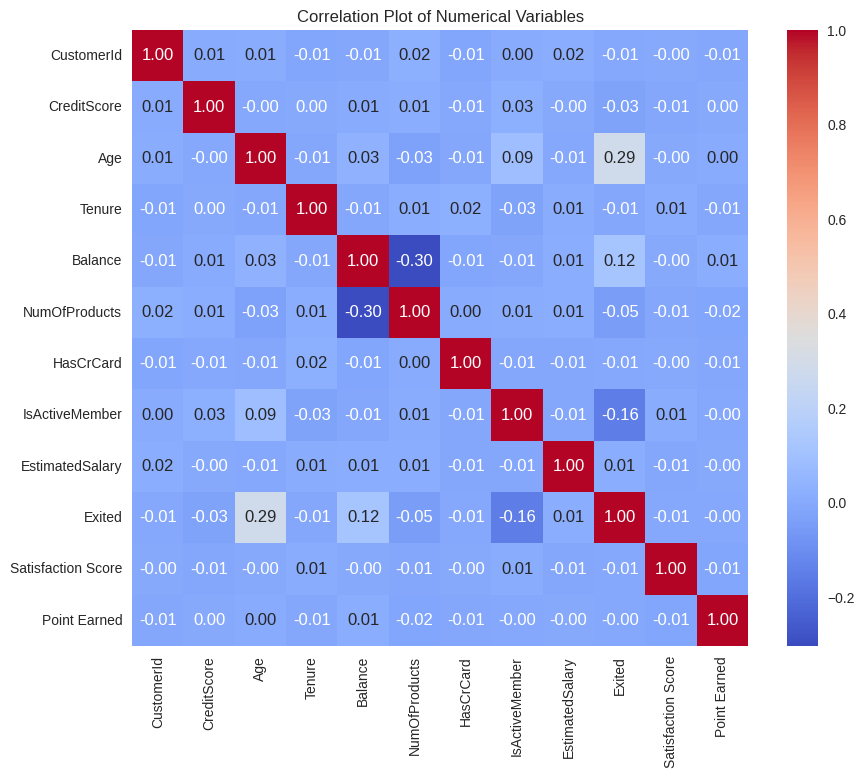

In [ ]:
numerical_cols = list(df.select_dtypes(include='number').columns)
print('List of numerical columns:', numerical_cols)

# Selecting only the numerical columns from the DataFrame
numerical_data = df[numerical_cols]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Plot of Numerical Variables')
plt.show()

insight:
terlihat bahwa variabel yang cukup mempengaruhi Exited adalah Age (0.29), Balance (0.12), dan isactivemember (-0.16)

In [ ]:
df['HasCrCard']= df['HasCrCard'].astype('object')
df['IsActiveMember']= df['IsActiveMember'].astype('object')
df['Exited']= df['Exited'].astype('object')
#df['Complain']= df['Complain'].astype('object')

In [ ]:
categorical_cols= list(df.select_dtypes(include='object'))
print('List of categorical columns:',categorical_cols)

numerical_cols= list(df.select_dtypes(include='number'))
print('list of numerical columns: ',numerical_cols)

List of categorical columns: ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Card Type']
list of numerical columns:  ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']


In [ ]:
numerical_cols= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

In [ ]:
df[numerical_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


### Distribusi banyaknya pelanggan telah menggunakan layanan perusahaan menurut jumlah tahun

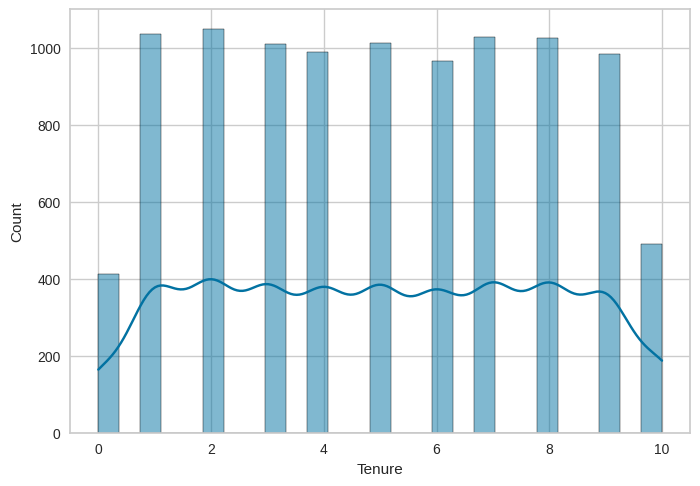

In [ ]:
sns.histplot(df, x='Tenure',kde=True);

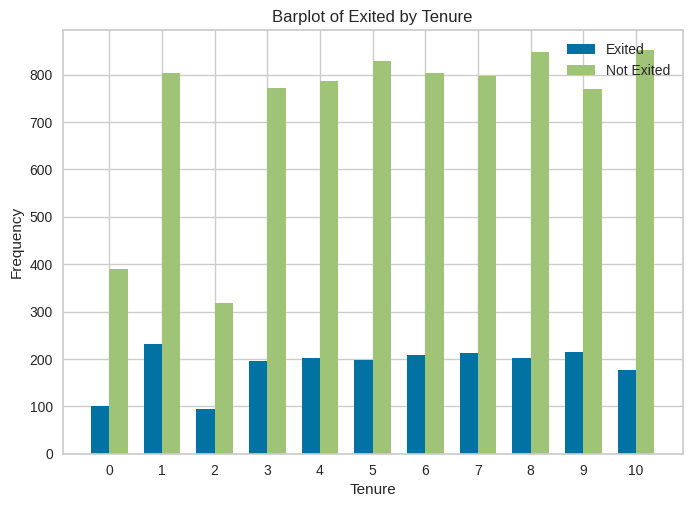

In [ ]:
# Hitung frekuensi exited dan tidak exited untuk setiap kategori tenure
exited_counts = df.groupby('Tenure')['Exited'].sum()
not_exited_counts = df.groupby('Tenure')['Exited'].count() - exited_counts

# Plotting
x = df['Tenure'].unique()
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, exited_counts, width, label='Exited')
bars2 = ax.bar(x + width/2, not_exited_counts, width, label='Not Exited')

# Adding labels, title, and legend
ax.set_xlabel('Tenure')
ax.set_ylabel('Frequency')
ax.set_title('Barplot of Exited by Tenure')
ax.set_xticks(x)
ax.legend()

# Show plot
plt.show()

In [ ]:
tenure_churn_rate= pd.crosstab(df['Tenure'], df['Exited'],normalize='index')
tenure_churn_rate

Exited,0,1
Tenure,,
0,0.769976,0.230024
1,0.775845,0.224155
2,0.808206,0.191794
3,0.788900,0.211100
4,0.794742,0.205258
5,0.793478,0.206522
6,0.797311,0.202689
7,0.827821,0.172179
8,0.807805,0.192195


Insight:
- grafik menunjukkan tidak ada perbedaan signifikan antara nasabah churn dan tidak berdasarkan lama nasabah berlangganan.
- namun apabila ditinjau dari perbandingan rasio, hasil menunjukkan bahwa nasabah churn memiliki pola cenderung naik-turun secara periodik.

In [ ]:
df.shape

(10000, 16)

### Frekuensi perbandingan nasabah churn dan tidak

In [ ]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [ ]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

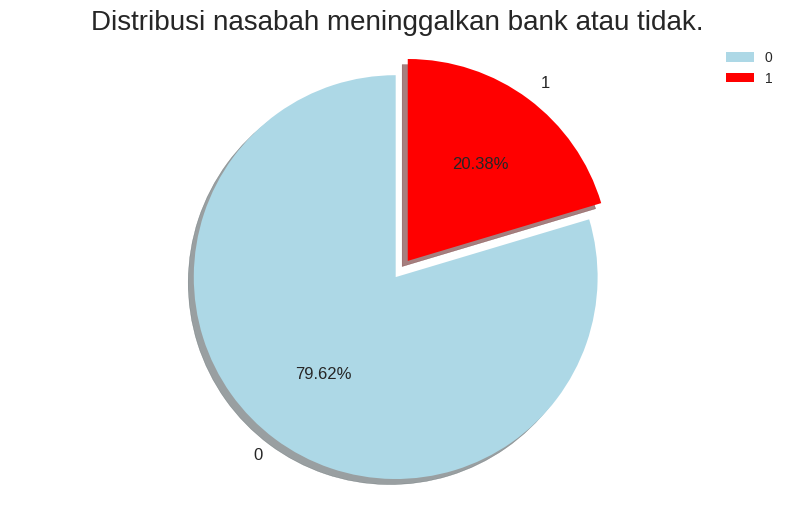

In [ ]:
# Menghitung distribusi churn
churn_dist = df['Exited'].value_counts()

# Membuat label dan warna untuk pie chart
labels = churn_dist.index
colors = ['lightblue', 'red']

# Menentukan explode
explode = (0, 0.1)  # Memisahkan slice kedua (Churn 'Yes')

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(churn_dist,
        colors=colors,
        explode=explode,
        labels=labels,
        shadow=True,
        startangle=90,
        autopct='%.2f%%',
        textprops={'fontsize': 12})  # Menambahkan properti teks untuk ukuran teks label
plt.title('Distribusi nasabah meninggalkan bank atau tidak.', fontsize=20)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.legend()  # Menampilkan legenda
plt.show()

Insight:

Data yang dimiliki memuat informasi bahwa perbandingan antara nasabah churn dan tidak adalah imbalance.

### Pengaruh Jenis Kelamin pada Churn

**Apakah Jenis Kelamin mempengaruhi seseorang Churn?**

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.groupby(['Gender','Exited']).size().unstack()

Exited,0,1
Gender,,
Female,3404,1139
Male,4558,899


In [ ]:
gender_churn_rate= pd.crosstab(df['Gender'], df['Exited'],normalize='index')
gender_churn_rate

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835257,0.164743


Insight:

 Pelanggan Female (perempuan) memiliki peluang Churn lebih tinggi dibandingkan yang Male (Laki-laki).

### Pengaruh Kepemilikan Kartu Kredit pada Churn

**Apakah HasCrCard (menunjukkan kepemilikan kartu kredit) mempengaruhi seseorang Churn?**

In [ ]:
df['HasCrCard'].value_counts(normalize=True)

HasCrCard
1    0.7055
0    0.2945
Name: proportion, dtype: float64

In [ ]:
pd.crosstab(df['HasCrCard'], df['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5630,1425


In [ ]:
pd.crosstab(df['HasCrCard'], df['Exited'],normalize='index')

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798016,0.201984


HasCrdCard (kepemilikan kartu kredit) tidak mempengaruhi Churn. Hal ini ditandakan dengan adanya tingkat Churn pada setiap pelanggan yang memiliki dan tidak memiliki kartu kredit tidak berbeda signifikan atau dapat dikatan juga tingkat churnnya cenderung memiliki persentase yang sama.

### Pengaruh Active Member pada Churn

**Apakah IsActiveMember (pelanggan aktif) cenderung tidak meninggalkan bank atau tidak?**

In [ ]:
df['IsActiveMember'].value_counts(normalize=True)

IsActiveMember
1    0.5151
0    0.4849
Name: proportion, dtype: float64

In [ ]:
pd.crosstab(df['IsActiveMember'], df['Exited'])

Exited,0,1
IsActiveMember,,
0,3546,1303
1,4416,735


In [ ]:
pd.crosstab(df['IsActiveMember'], df['Exited'],normalize='index')

Exited,0,1
IsActiveMember,,
0,0.731285,0.268715
1,0.857309,0.142691


Insight:

Nasabah non active member memiliki peluang Churn lebih tinggi dibandingkan yang active member.

### EDA Variabel Kategori

In [ ]:
categorical_cols

['Surname',
 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Card Type']

In [ ]:
c2= ['Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'NumOfProducts',
 #'Complain',
 'Card Type',
     'Satisfaction Score']

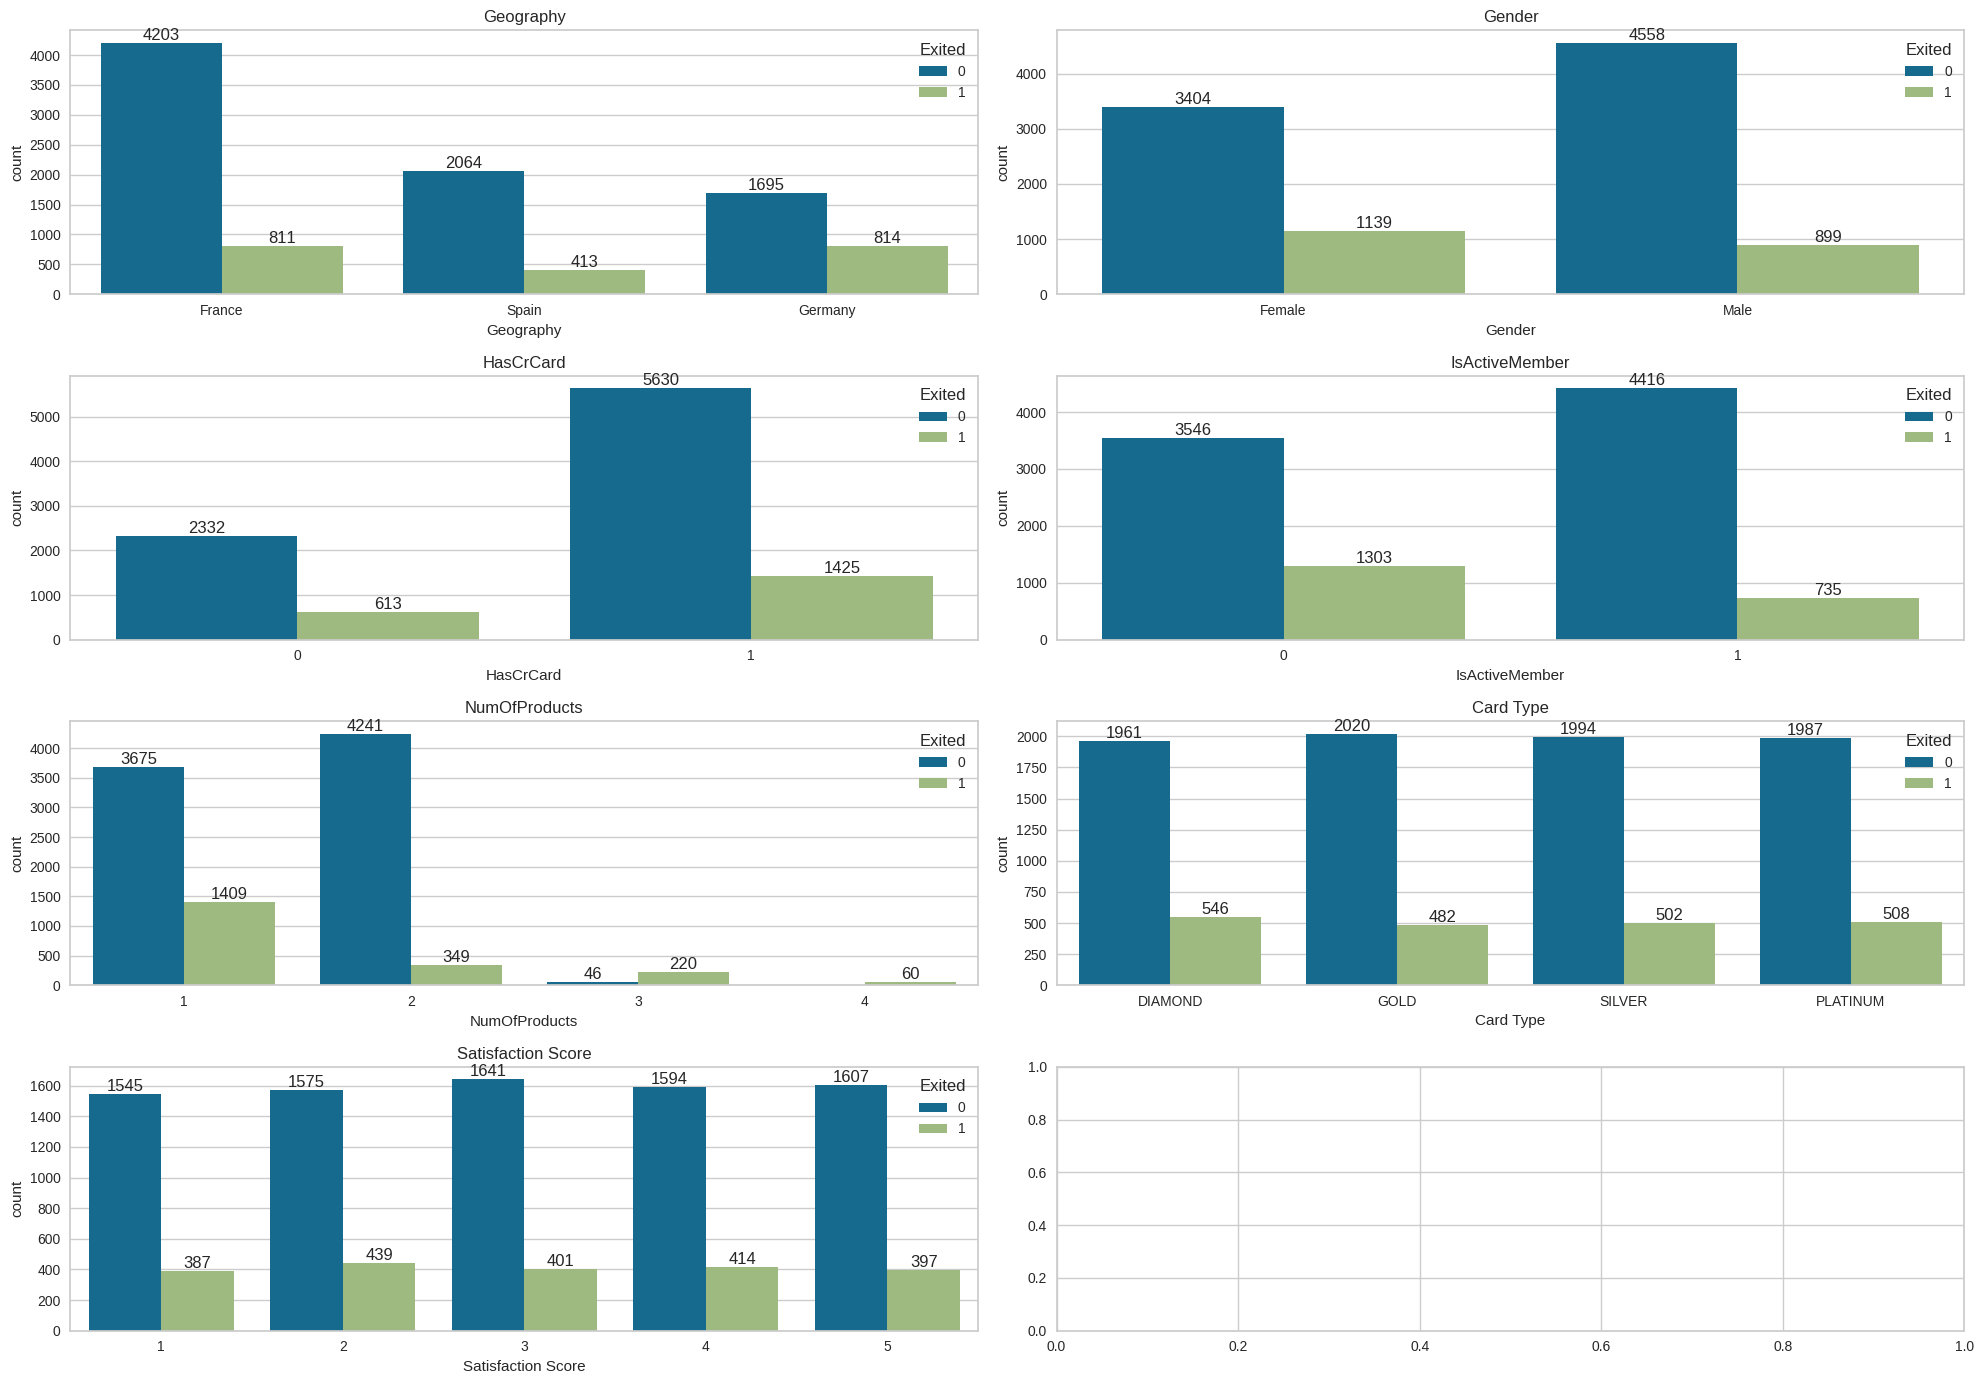

In [ ]:
fig, axes= plt.subplots(nrows=4, ncols=2, figsize=(20,14))

for i,col in enumerate(c2):
  ax= sns.countplot(data=df,
                    x=col,
                    hue='Exited',
                    ax=axes[i//2, i%2])
  ax.set_title(col)

  for container in ax.containers:
    ax.bar_label(container,fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

Insight:
- Gender, IsActiveMember, dan NumOfProduct berpengaruh terhadap kemungkinan seseorang Churn.


In [ ]:
numerical_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Satisfaction Score',
 'Point Earned']

In [ ]:
c3 = ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'EstimatedSalary',
 'Point Earned']

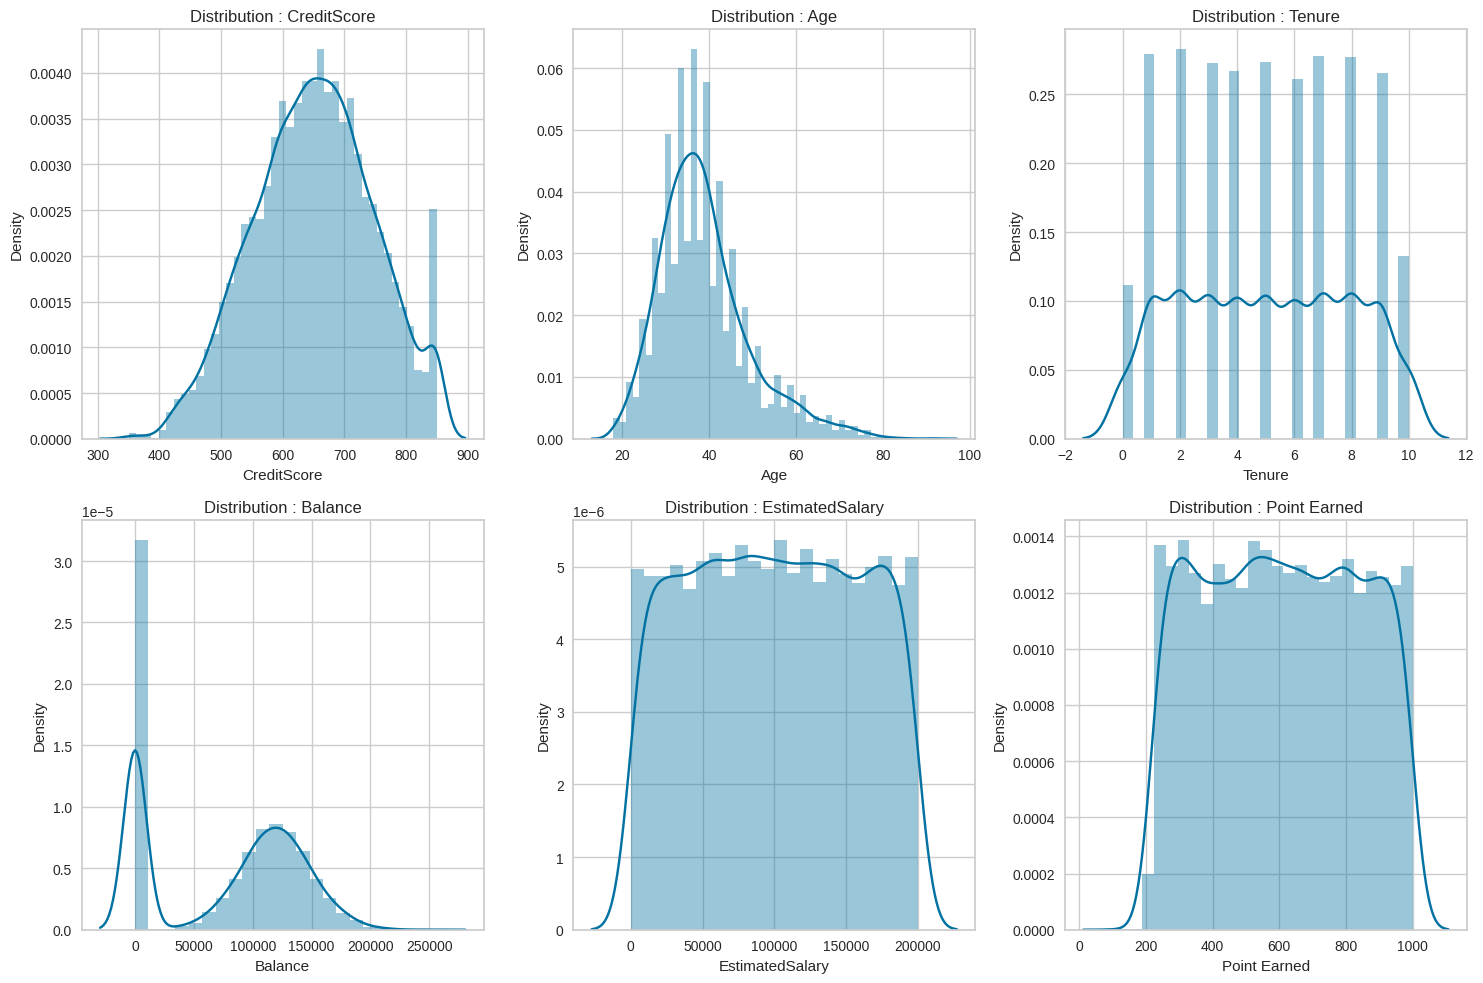

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
for i in range(len(c3)):
    plt.subplot(2,3,i+1)
    sns.distplot(df[c3[i]])
    title = 'Distribution : ' + c3[i]
    plt.title(title)
plt.tight_layout()
plt.show()

### Pengaruh Usia pada Churn

In [ ]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
df.groupby('Exited').agg(median_age=('Age','median')) #median age 37

,median_age
Exited,
0,36.0
1,45.0


In [ ]:
batas_age = [18, 32, 37, 44, 92]
kategori = ['18-31', '32-36', '37-43','44-92']
df['Range usia'] = pd.cut(df['Age'], bins=batas_age, labels=kategori)
df[['Age','Range usia']]

,Age,Range usia
0,42,37-43
1,41,37-43
2,42,37-43
3,39,37-43
4,43,37-43
...,...,...
9995,39,37-43
9996,35,32-36
9997,36,32-36
9998,42,37-43


<Axes: xlabel='Range usia', ylabel='count'>

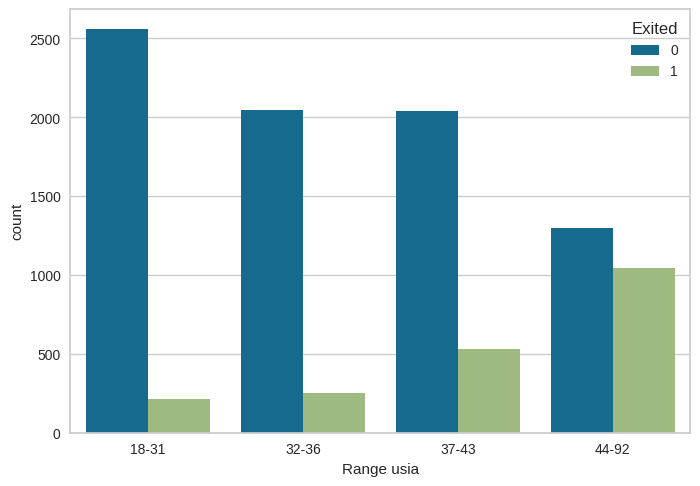

In [ ]:
sns.countplot(x='Range usia', data=df, hue = 'Exited')

In [ ]:
pd.crosstab(df['Range usia'], df['Exited'])

Exited,0,1
Range usia,,
18-31,2557,211
32-36,2048,249
37-43,2041,532
44-92,1296,1044


In [ ]:
pd.crosstab(df['Range usia'], df['Exited'],normalize='index')

Exited,0,1
Range usia,,
18-31,0.923772,0.076228
32-36,0.891598,0.108402
37-43,0.793237,0.206763
44-92,0.553846,0.446154


Insight :
Nasabah dengan usia lebih dari usia 37 tahun cenderung Churn, dan paling tinggi usia 44-92 tahun.

### Korelasi Point pengguna kartu kredit dengan churn

In [ ]:
batas_point = [119, 410, 605, 801, 1000]
kategori = ['119-409', '410-604', '605-800','801-1000']
df['Range Point Earned'] = pd.cut(df['Point Earned'], bins=batas_point, labels=kategori)
df[['Point Earned','Range Point Earned']]

,Point Earned,Range Point Earned
0,464,410-604
1,456,410-604
2,377,119-409
3,350,119-409
4,425,410-604
...,...,...
9995,300,119-409
9996,771,605-800
9997,564,410-604
9998,339,119-409


<Axes: xlabel='Range Point Earned', ylabel='count'>

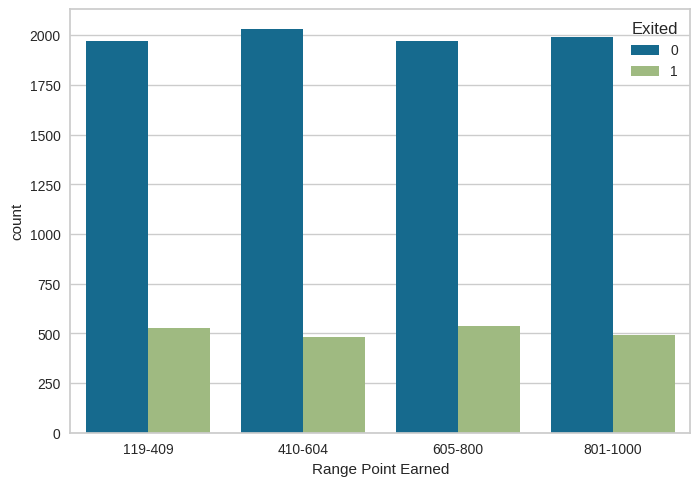

In [ ]:
sns.countplot(x='Range Point Earned', data=df, hue = 'Exited')

In [ ]:
pd.crosstab(df['Range Point Earned'], df['Exited'],normalize='index')

Exited,0,1
Range Point Earned,,
119-409,0.789200,0.210800
410-604,0.808367,0.191633
605-800,0.785401,0.214599
801-1000,0.801773,0.198227


insight:
tidak ada perbedaan signifikan nasabah churn dan tidak berdasarkan range point earned.

## Data Preprocessing

In [ ]:
categorical_cols= list(df.select_dtypes(include='object'))
print('List of categorical columns:',categorical_cols)

List of categorical columns: ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Card Type']


In [ ]:
df['HasCrCard']= df['HasCrCard'].astype('int')
df['IsActiveMember']= df['IsActiveMember'].astype('int')
df['Exited']= df['Exited'].astype('int')
#df['Complain']= df['Complain'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerId          10000 non-null  int64   
 1   Surname             10000 non-null  object  
 2   CreditScore         10000 non-null  int64   
 3   Geography           10000 non-null  object  
 4   Gender              10000 non-null  object  
 5   Age                 10000 non-null  int64   
 6   Tenure              10000 non-null  int64   
 7   Balance             10000 non-null  float64 
 8   NumOfProducts       10000 non-null  int64   
 9   HasCrCard           10000 non-null  int64   
 10  IsActiveMember      10000 non-null  int64   
 11  EstimatedSalary     10000 non-null  float64 
 12  Exited              10000 non-null  int64   
 13  Satisfaction Score  10000 non-null  int64   
 14  Card Type           10000 non-null  object  
 15  Point Earned        10000 non-null  i

### Grouping Features

In [ ]:
to_remove = ['CustomerId', 'Surname','Range usia', 'Range Point Earned']
df= df.drop(columns=to_remove)
#quick separation to categorical and numerical features
target = ['Exited']
#cat_feats = ['Geography', 'Gender', 'Card Type', 'Satisfaction Score', 'IsActiveMember', 'HasCrCard']
#num_feats = [col for col in data if col not in (cat_feats+target)]

### Split Data Train dan Test

In [ ]:
#pisahkan fitur dan target
X = df.drop(target,axis=1)
y = df['Exited']

#membuat data train dan test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#validation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [ ]:
categorical_cols= list(X_train.select_dtypes(include='object'))
print('List of categorical columns:',categorical_cols)

numerical_cols= list(X_train.select_dtypes(include='number'))
print('list of numerical columns: ',numerical_cols)

List of categorical columns: ['Geography', 'Gender', 'Card Type']
list of numerical columns:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']


### Pipeline

In [ ]:
categorical_cols = ['Gender', 'Geography']  # Assuming these are categorical columns
enc_categorical_cols = ['Card Type']  # Assuming these are also categorical columns

In [ ]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [ ]:
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[np.array(['SILVER','GOLD', 'PLATINUM','DIAMOND'], dtype=object)]))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('encoder_nominal', categorical_transformer, categorical_cols),
        ('enc_cat_nominal', ordinal_transformer, enc_categorical_cols)
    ],
    remainder='passthrough',
    verbose=True
)

In [ ]:
# Apply preprocessing steps
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer]  (2 of 3) Processing encoder_nominal, total=   0.0s
[ColumnTransformer]  (3 of 3) Processing enc_cat_nominal, total=   0.0s


In [ ]:
# Convert processed data into DataFrame
numeric_cols = numerical_cols
encoded_cat_cols = preprocessor.named_transformers_['encoder_nominal']['onehot'].get_feature_names_out(input_features=categorical_cols)
ordinal_cols = enc_categorical_cols

In [ ]:
transformer_cols = numeric_cols + list(encoded_cat_cols) + ordinal_cols
X_train_df = pd.DataFrame(X_train_processed, columns=transformer_cols)
X_test_scaler = pd.DataFrame(X_test_processed, columns=transformer_cols)

In [ ]:
# Display the processed data
print("X_train processed:\n", X_train_df.head())
print("\nX_test processed:\n", X_test_scaler.head())

X_train processed:
    CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.672  0.189189     0.6  0.000000       0.333333        1.0   
1        0.564  0.324324     0.4  0.476786       0.333333        1.0   
2        0.418  0.081081     0.3  0.457317       0.000000        1.0   
3        0.422  0.121622     0.9  0.540606       0.000000        1.0   
4        0.334  0.513514     0.9  0.566554       0.000000        0.0   

   IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  \
0             1.0         0.895550                0.25      0.414576   
1             1.0         0.980029                0.75      0.951016   
2             0.0         0.429261                0.75      0.195938   
3             0.0         0.765408                0.25      0.482676   
4             0.0         0.197107                0.50      0.673835   

   Gender_Female  Gender_Male  Geography_France  Geography_Germany  \
0            0.0          1.0               

### SMOTE

In [ ]:
sm          = SMOTE(
    sampling_strategy = "auto",
    k_neighbors = 5,
    random_state=42)

X_trains, y_trains   = sm.fit_resample(X_train_df, y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :", Counter(y_train))
print("After SMOTE :", Counter(y_trains))

Before SMOTE : Counter({0: 6355, 1: 1645})
After SMOTE : Counter({0: 6355, 1: 6355})


## Modelling

### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_trains, y_trains)

pred_rf = rf.predict(X_test_scaler)

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1607
           1       0.61      0.60      0.61       393

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
print('F-measure Random Forest test:', f1_score(y_test,  pred_rf, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test,  pred_rf, pos_label=1))
print('Precision Random Forest test:', precision_score(y_test,  pred_rf,))

F-measure Random Forest test: 0.6059050064184852
Recall Random Forest test: 0.6005089058524173
Precision Random Forest test: 0.6113989637305699


In [ ]:
from sklearn.metrics import balanced_accuracy_score
bal_acc_rf = balanced_accuracy_score(y_test, pred_rf)
bal_acc_rf

0.7535836377426368

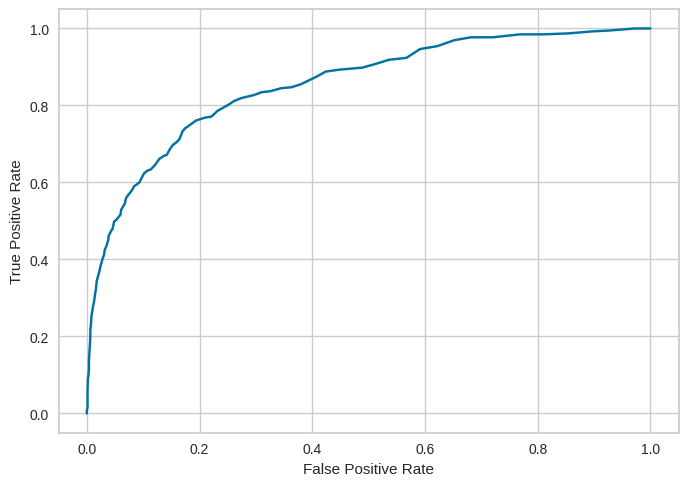

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_pred_prob_rf = rf.predict_proba(X_test_scaler)
y_pred_prob_rf = y_pred_prob_rf[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_rf)
plt = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot()

In [ ]:
from sklearn.metrics import roc_auc_score

auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(auc_rf)

0.8543561802609766


In [ ]:
from imblearn.metrics import geometric_mean_score
gmean_rf = (geometric_mean_score(y_test, pred_rf))
print(gmean_rf)

0.737872906082181


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_trains, y_trains)

pred_nb = nb.predict(X_test_scaler)

In [ ]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1607
           1       0.39      0.69      0.50       393

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.81      0.73      0.75      2000



In [ ]:
print('F-measure Naive Bayes test:', f1_score(y_test,  pred_nb, pos_label=1))
print('Recall Naive Bayes test:', recall_score(y_test,  pred_nb, pos_label=1))
print('Precision Naive Bayes test:', precision_score(y_test,  pred_nb,))

F-measure Naive Bayes test: 0.5
Recall Naive Bayes test: 0.6895674300254453
Precision Naive Bayes test: 0.3921852387843705


In [ ]:
from sklearn.metrics import balanced_accuracy_score
bal_acc_nb = balanced_accuracy_score(y_test, pred_nb)
bal_acc_nb

0.7141054324987214

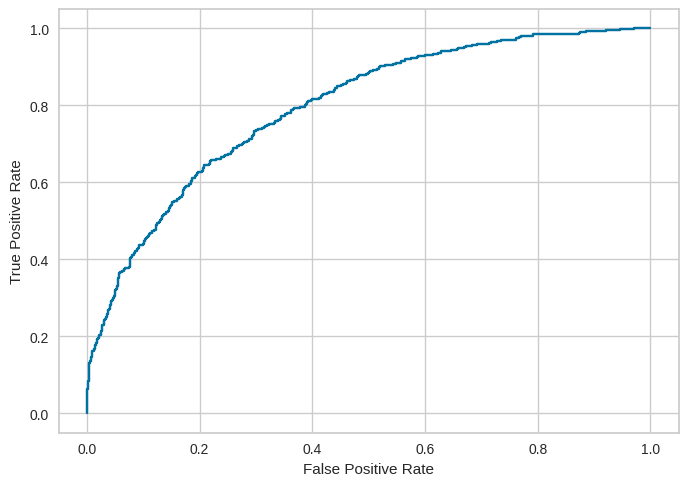

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_pred_prob_nb = nb.predict_proba(X_test_scaler)
y_pred_prob_nb = y_pred_prob_nb[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_nb)
plt = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot()

In [ ]:
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
print(auc_nb)

0.7946864148738583


In [ ]:
gmean_nb = geometric_mean_score(y_test, pred_nb)
print(gmean_nb)

0.7136837220777894


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_trains, y_trains)

pred_lr = lr.predict(X_test_scaler)

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



In [ ]:
print('F-measure Logistic Regression test:', f1_score(y_test,  pred_nb, pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test,  pred_nb, pos_label=1))
print('Precision Logistic Regression test:', precision_score(y_test,  pred_nb,))

F-measure Logistic Regression test: 0.5
Recall Logistic Regression test: 0.6895674300254453
Precision Logistic Regression test: 0.3921852387843705


In [ ]:
bal_acc_lr = balanced_accuracy_score(y_test, pred_lr)
bal_acc_lr

0.720294164683454

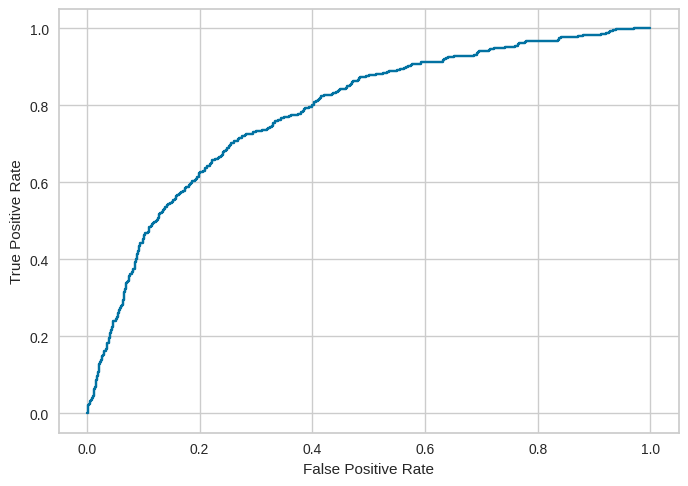

In [ ]:
y_pred_prob_lr = lr.predict_proba(X_test_scaler)
y_pred_prob_lr = y_pred_prob_lr[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_lr)
plt = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot()

In [ ]:
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
print(auc_lr)

0.781189484301347


In [ ]:
gmean_lr = geometric_mean_score(y_test, pred_lr)
print(gmean_lr)

0.7202748017576646


### Decision Tree

In [ ]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr.fit(X_trains, y_trains)

pred_tr = tr.predict(X_test_scaler)

In [ ]:
print(classification_report(y_test, pred_tr))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1607
           1       0.44      0.55      0.49       393

    accuracy                           0.78      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.80      0.78      0.78      2000



In [ ]:
print('F-measure Logistic Regression test:', f1_score(y_test,  pred_tr, pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test,  pred_tr, pos_label=1))
print('Precision Logistic Regression test:', precision_score(y_test,  pred_tr,))

F-measure Logistic Regression test: 0.4909090909090909
Recall Logistic Regression test: 0.549618320610687
Precision Logistic Regression test: 0.44353182751540043


In [ ]:
bal_acc_tr = balanced_accuracy_score(y_test, pred_tr)
bal_acc_tr

0.6904905542070237

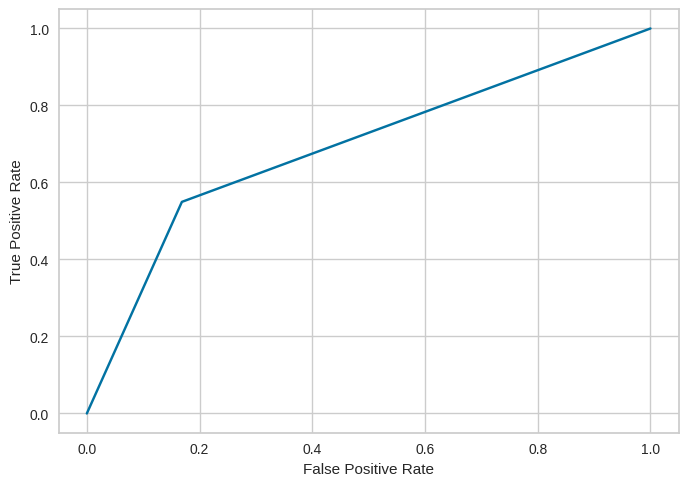

In [ ]:
y_pred_prob_tr = tr.predict_proba(X_test_scaler)
y_pred_prob_tr = y_pred_prob_tr[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_tr)
plt = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot()

In [ ]:
auc_tr = roc_auc_score(y_test, y_pred_prob_tr)
print(auc_tr)

0.6904905542070237


In [ ]:
gmean_tr = geometric_mean_score(y_test, pred_tr)
print(gmean_tr)

0.6759676170133462


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_trains, y_trains)

pred_adb = adb.predict(X_test_scaler)

In [ ]:
print(classification_report(y_test, pred_adb))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1607
           1       0.55      0.66      0.60       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



In [ ]:
print('F-measure Logistic Regression test:', f1_score(y_test,  pred_adb, pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test,  pred_adb, pos_label=1))
print('Precision Logistic Regression test:', precision_score(y_test,  pred_adb,))

F-measure Logistic Regression test: 0.5977011494252873
Recall Logistic Regression test: 0.6615776081424937
Precision Logistic Regression test: 0.5450733752620545


In [ ]:
bal_acc_adb = balanced_accuracy_score(y_test, pred_adb)
bal_acc_adb

0.7632716914390129

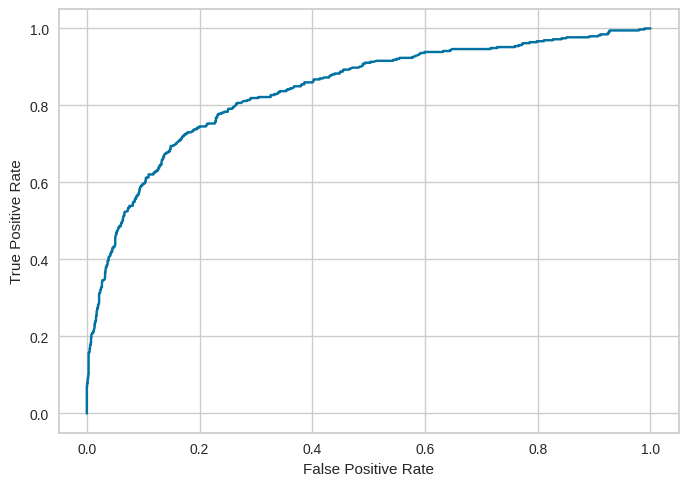

In [ ]:
y_pred_prob_adb = adb.predict_proba(X_test_scaler)
y_pred_prob_adb = y_pred_prob_adb[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_adb)
plt = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot()

In [ ]:
auc_adb = roc_auc_score(y_test, y_pred_prob_adb)
print(auc_adb)

0.839340765828888


In [ ]:
gmean_adb = geometric_mean_score(y_test, pred_adb)
print(gmean_adb)

0.7564667794256746


### XGBoost

In [ ]:
import xgboost as xgb
reg = xgb.XGBClassifier()
reg.fit(X_trains, y_trains)

pred_reg = reg.predict(X_test_scaler)

In [ ]:
print(classification_report(y_test, pred_reg))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
print('F-measure Logistic Regression test:', f1_score(y_test,  pred_reg, pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test,  pred_reg, pos_label=1))
print('Precision Logistic Regression test:', precision_score(y_test,  pred_reg,))

F-measure Logistic Regression test: 0.5986206896551723
Recall Logistic Regression test: 0.5521628498727735
Precision Logistic Regression test: 0.6536144578313253


In [ ]:
bal_acc_reg = balanced_accuracy_score(y_test, pred_reg)
bal_acc_reg

0.7403004666289816

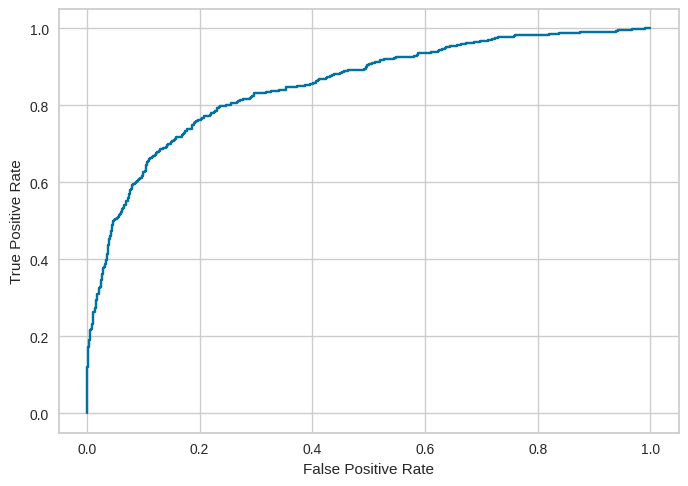

In [ ]:
y_pred_prob_reg = reg.predict_proba(X_test_scaler)
y_pred_prob_reg = y_pred_prob_reg[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_reg)
plt = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.plot()

In [ ]:
auc_reg = roc_auc_score(y_test, y_pred_prob_reg)
print(auc_reg)

0.8509748223025535


In [ ]:
gmean_reg = geometric_mean_score(y_test, pred_reg)
print(gmean_reg)

0.715995124321655


## Model Terbaik

In [ ]:
data = {'Balanced Accuracy': [bal_acc_rf, bal_acc_nb, bal_acc_lr, bal_acc_tr, bal_acc_adb, bal_acc_reg],
        'AUC Score': [auc_rf, auc_nb, auc_lr, auc_tr, auc_adb, auc_reg],
        'G-mean':[gmean_rf, gmean_nb, gmean_lr, gmean_tr, gmean_adb, gmean_reg]}

data1 = pd.DataFrame(data, index = ['Random Forest', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'AdaBoost','XGBoost'])
data1

,Balanced Accuracy,AUC Score,G-mean
Random Forest,0.753584,0.854356,0.737873
Naive Bayes,0.714105,0.794686,0.713684
Logistic Regression,0.720294,0.781189,0.720275
Decision Tree,0.690491,0.690491,0.675968
AdaBoost,0.763272,0.839341,0.756467
XGBoost,0.740300,0.850975,0.715995


Insight:
Dari hasil perbandingan performa model, model Random Forest, AdaBoost, dan XGBoost memberikan AUC Score "sangat baik" menurut kriteria Gorunescu (2011). Selanjutnya ditinjau dari nilai Balanced Accuracy dan G-mean, AdaBoost memberikan nilai tertinggi, sehingga AdaBoost menjadi model terbaik dalam mengklasifikan nasabah Churn dalam dataset ini.

### AdaBoost - Seleksi Fitur

In [ ]:
X_test_scaler

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Card Type
0,0.492,0.189189,0.3,0.385452,0.333333,0.0,0.0,0.208616,0.00,0.652330,0.0,1.0,0.0,1.0,0.0,1.0
1,0.546,0.337838,0.1,0.000000,0.333333,1.0,1.0,0.731883,0.25,0.412186,0.0,1.0,1.0,0.0,0.0,0.0
2,0.502,0.351351,0.4,0.000000,0.333333,1.0,0.0,0.292531,0.00,0.140980,1.0,0.0,0.0,0.0,1.0,1.0
3,0.312,0.554054,0.8,0.474902,0.333333,1.0,1.0,0.853458,0.25,0.974910,0.0,1.0,0.0,1.0,0.0,0.0
4,0.420,0.121622,0.7,0.498194,0.000000,1.0,1.0,0.573241,1.00,0.351254,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.504,0.472973,0.5,0.391668,0.000000,0.0,1.0,0.224875,1.00,0.776583,1.0,0.0,0.0,1.0,0.0,2.0
1996,0.518,0.094595,1.0,0.000000,0.000000,0.0,1.0,0.549353,0.25,0.584229,0.0,1.0,1.0,0.0,0.0,2.0
1997,0.760,0.391892,0.7,0.000000,0.000000,1.0,0.0,0.166515,0.25,0.407407,1.0,0.0,1.0,0.0,0.0,2.0
1998,0.684,0.148649,0.4,0.000000,0.000000,1.0,0.0,0.383558,0.50,0.624851,0.0,1.0,1.0,0.0,0.0,2.0


In [ ]:
result= permutation_importance(adb, X_test_scaler, y_test,
                               n_repeats=10,
                               #random_state=3,
                               scoring='accuracy',
                               n_jobs=-1)

feature_imp_df= pd.DataFrame({'Feature':X_test_scaler.columns,
                              'importance': result.importances_mean,
                              '+/- std':result.importances_std}).sort_values('importance',ascending=False)

feature_imp_df

,Feature,importance,+/- std
1,Age,0.07265,0.006986
4,NumOfProducts,0.07100,0.005454
6,IsActiveMember,0.01675,0.002239
13,Geography_Germany,0.01390,0.003223
11,Gender_Male,0.00945,0.002631
7,EstimatedSalary,0.00405,0.001724
0,CreditScore,0.00210,0.000490
2,Tenure,0.00205,0.001916
8,Satisfaction Score,0.00200,0.002627
3,Balance,0.00045,0.001474


In [ ]:
feature_imp_df.query('importance>=0.001')['Feature'].values

array(['Age', 'NumOfProducts', 'IsActiveMember', 'Geography_Germany',
       'Gender_Male', 'EstimatedSalary', 'CreditScore', 'Tenure',
       'Satisfaction Score'], dtype=object)

In [ ]:
selected_feature=feature_imp_df.query('importance>=0.001')['Feature'].values.tolist()

In [ ]:
selected_feature

['Age',
 'NumOfProducts',
 'IsActiveMember',
 'Geography_Germany',
 'Gender_Male',
 'EstimatedSalary',
 'CreditScore',
 'Tenure',
 'Satisfaction Score']

In [ ]:
adb_selected_feature =  AdaBoostClassifier()
adb_selected_feature.fit(X_trains[selected_feature], y_trains)

AdaBoostClassifier()

In [ ]:
y_train_pred= adb_selected_feature.predict(X_trains[selected_feature])
y_test_pred= adb_selected_feature.predict(X_test_scaler[selected_feature])

In [ ]:
print(classification_report(y_trains,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6355
           1       0.86      0.86      0.86      6355

    accuracy                           0.86     12710
   macro avg       0.86      0.86      0.86     12710
weighted avg       0.86      0.86      0.86     12710



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1607
           1       0.55      0.67      0.60       393

    accuracy                           0.83      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.83      0.83      2000



### Hyperparameter Tuning

dapat menggunakan manual search, random search, atau grid search

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define AdaBoostClassifier
adb= AdaBoostClassifier()

In [ ]:
# Perform GridSearchCV
grid_search = GridSearchCV(adb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trains, y_trains)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 1, 'n_estimators': 150}
Best score: 0.8654602675059009


In [ ]:
# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaler, y_test)
print("Test set score:", test_score)

Test set score: 0.8445


In [ ]:
y_train_pred = grid_search.predict(X_trains)
y_test_pred = grid_search.predict(X_test_scaler)

In [ ]:
print(classification_report(y_trains,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6355
           1       0.90      0.87      0.88      6355

    accuracy                           0.88     12710
   macro avg       0.88      0.88      0.88     12710
weighted avg       0.88      0.88      0.88     12710



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.62      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.85      0.84      0.85      2000



In [ ]:
result= permutation_importance(grid_search, X_test_scaler, y_test,
                               n_repeats=10,
                               #random_state=3,
                               scoring='accuracy',
                               n_jobs=-1)

feature_imp_df= pd.DataFrame({'Feature':X_test_scaler.columns,
                              'importance': result.importances_mean,
                              '+/- std':result.importances_std}).sort_values('importance',ascending=False)


In [ ]:
feature_imp_df

,Feature,importance,+/- std
1,Age,0.07750,0.004593
4,NumOfProducts,0.06555,0.004233
6,IsActiveMember,0.01940,0.003208
13,Geography_Germany,0.01020,0.003280
11,Gender_Male,0.00775,0.002723
3,Balance,0.00610,0.002853
2,Tenure,0.00490,0.002567
0,CreditScore,0.00370,0.000678
9,Point Earned,0.00370,0.001990
8,Satisfaction Score,0.00255,0.001890


In [ ]:
selected_feature=feature_imp_df.query('importance>=0.0001')['Feature'].values.tolist()

In [ ]:
selected_feature

['Age',
 'NumOfProducts',
 'IsActiveMember',
 'Geography_Germany',
 'Gender_Male',
 'Balance',
 'Tenure',
 'CreditScore',
 'Point Earned',
 'Satisfaction Score',
 'EstimatedSalary']

In [ ]:
print('jumlah fitur keseluruhan', len(X_test_scaler.columns))
print('jumlah fitur terseleksi', len(selected_feature))

jumlah fitur keseluruhan 16
jumlah fitur terseleksi 11


In [ ]:
adb_grid_search_best = grid_search.best_estimator_
adb_grid_search_best.fit(X_trains[selected_feature], y_trains)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

In [ ]:
y_train_pred= adb_grid_search_best.predict(X_trains[selected_feature])
y_test_pred= adb_grid_search_best.predict(X_test_scaler[selected_feature])

In [ ]:
print(classification_report(y_trains,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6355
           1       0.90      0.87      0.88      6355

    accuracy                           0.88     12710
   macro avg       0.88      0.88      0.88     12710
weighted avg       0.88      0.88      0.88     12710



In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.62      0.61       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.85      0.84      0.85      2000



## Save Model & Infenrece

In [ ]:
import joblib
# Save the model
joblib.dump(adb_grid_search_best, 'adb_grid_search_best_model.pkl')

['adb_grid_search_best_model.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('adb_grid_search_best_model.pkl')

In [ ]:
# Perform inference
predictions = loaded_model.predict(X_test_scaler[selected_feature])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.8445


In [ ]:
data_inf= X_test.tail(5).copy()

In [ ]:
data_inf

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
6412,602,Germany,Female,53,5,98268.84,1,0,1,45038.29,5,PLATINUM,813
8285,609,France,Male,25,10,0.00,1,0,1,109895.16,2,PLATINUM,652
7853,730,France,Female,47,7,0.00,1,1,0,33373.26,2,PLATINUM,504
1095,692,France,Male,29,4,0.00,1,1,0,76755.99,3,PLATINUM,686
6929,628,Germany,Male,39,1,115341.19,1,1,1,107674.30,4,SILVER,887


In [ ]:
data_inf_new= preprocessor.transform(data_inf)

encoded_cat= preprocessor.named_transformers_['encoder_nominal']['onehot'].get_feature_names_out(categorical_cols)
tranformer_cols= (numerical_cols + list(encoded_cat) + enc_categorical_cols)

data_inf_new= pd.DataFrame(data_inf_new, columns=tranformer_cols)
data_inf_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Card Type
0,0.504,0.472973,0.5,0.391668,0.0,0.0,1.0,0.224875,1.00,0.776583,1.0,0.0,0.0,1.0,0.0,2.0
1,0.518,0.094595,1.0,0.000000,0.0,0.0,1.0,0.549353,0.25,0.584229,0.0,1.0,1.0,0.0,0.0,2.0
2,0.760,0.391892,0.7,0.000000,0.0,1.0,0.0,0.166515,0.25,0.407407,1.0,0.0,1.0,0.0,0.0,2.0
3,0.684,0.148649,0.4,0.000000,0.0,1.0,0.0,0.383558,0.50,0.624851,0.0,1.0,1.0,0.0,0.0,2.0
4,0.556,0.283784,0.1,0.459713,0.0,1.0,1.0,0.538242,0.75,0.864994,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
selected_feature

['Age',
 'NumOfProducts',
 'IsActiveMember',
 'Geography_Germany',
 'Gender_Male',
 'Balance',
 'Tenure',
 'CreditScore',
 'Point Earned',
 'Satisfaction Score',
 'EstimatedSalary']

In [ ]:
# Use the loaded model to make predictions on the selected features
predictions = loaded_model.predict(data_inf_new[selected_feature])

df_final= data_inf.copy()
df_final['prediction_exited'] = predictions
df_final

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,prediction_exited
6412,602,Germany,Female,53,5,98268.84,1,0,1,45038.29,5,PLATINUM,813,1
8285,609,France,Male,25,10,0.00,1,0,1,109895.16,2,PLATINUM,652,0
7853,730,France,Female,47,7,0.00,1,1,0,33373.26,2,PLATINUM,504,1
1095,692,France,Male,29,4,0.00,1,1,0,76755.99,3,PLATINUM,686,0
6929,628,Germany,Male,39,1,115341.19,1,1,1,107674.30,4,SILVER,887,0


insight:

Berdasarkan hasil prediksi kita mengetahui bahwa nasabah yang berusia lebih dari 37 tahun dan berjenis kelamin Femake akan cenderung Churn.

## Kesimpulan

- dari hasil analisis diperoleh insight bahwa usia (age) dan gender (jenis kelamin) mempengaruhi kecenderungan nasabah untuk churn. nasabah dengan range usia diatas 37 tahun dan berjenis kelamin perempuan memiliki kecenderungan untuk churn.
- dari tahap evaluasi model, diperoleh hasil bahwa model adaboost memberikan hasil terbaik untuk mengklasifikasikan nasabah yang melakukan churn. menggunakan hyperparameter tuning, diperoleh adaboost cukup powerful untuk memprediksi nasabah yang melakukan churn ditunjukkan dengan nilai accuracy mencapai 84%.